In [196]:
# import
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')

In [197]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/file/imdb_final_6.xlsx', index_col=0)
df.head()

,korean_title,english_title,year,total_season_num,runtime,genre,age_rating,production_country,total_count,total_rate,...,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url,wins,nominations
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,오징어 게임,Squid Game,2021,1,55,"액션, 드라마, 스릴러",19,대한민국,549000,8.0,...,NaN,NaN,NaN,['Hwang Dong-hyuk'],['Hwang Dong-hyuk'],"['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwak...",Squid Game (TV Series 2021),https://www.imdb.com/title/tt10919420/,43,85
1,12인의 심판자,The Twelve,2019,1,54,"드라마, 스릴러",19,벨기에,6500,7.4,...,NaN,NaN,NaN,"['Kaat Beels', 'Wouter Bouvijn']","['Bert Van Dael', 'Nele Meirhaeghe', 'Roel Mon...","['Luc De Ruelle', 'Maaike Neuville', 'Tom Verm...",The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/,8,8
2,희생자 게임,The Victims' Game,2020,1,60,"드라마, 범죄, 스릴러",19,대만,1900,7.3,...,NaN,NaN,NaN,"['David Chuang', 'Kuan-Chung Chen']","['Joyce Liu', 'Jui-Liang Hsu', 'Shih-Keng Chie...","['Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Si...",The Victims' Game (TV Series 2020),https://www.imdb.com/title/tt12079212/,1,12
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,2,52,"SF, 드라마, 판타지, 액션",15,미국,68000,7.7,...,NaN,NaN,NaN,"['Alexis Ostrander', 'Carol Banker', 'Ciarán F...","['Beth Schwartz', 'Bo Yeon Kim', 'Carly Woodwo...","['Nonso Anozie', 'Christian Convery', 'Stefani...",Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/,12,26
4,스위트홈,Sweet Home,2020,2,60,"스릴러, 드라마, 판타지, 공포, SF, 범죄",19,대한민국,33000,7.3,...,NaN,NaN,NaN,"['Jang Young-woo', 'Lee Eung-bok', 'Park So-hy...","['Hong So-ri', 'Hwang Young-Chan', 'Kim Hyung-...","['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...",Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/,1,3


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 905 entries, 0 to 904
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        905 non-null    object 
 1   english_title       905 non-null    object 
 2   year                905 non-null    int64  
 3   total_season_num    905 non-null    int64  
 4   runtime             905 non-null    int64  
 5   genre               905 non-null    object 
 6   age_rating          905 non-null    object 
 7   production_country  905 non-null    object 
 8   total_count         905 non-null    int64  
 9   total_rate          905 non-null    float64
 10  watchlist           905 non-null    int64  
 11  popularity          905 non-null    int64  
 12  user_review         905 non-null    int64  
 13  critic_review       905 non-null    int64  
 14  production          821 non-null    object 
 15  distributor         897 non-null    object 
 16  season_1     

In [210]:
# 연령 제한 숫자로 변환
df['age_rating'] = df['age_rating'].replace('ALL', 0).astype(int)

array([19, 15, 12, 'ALL', 7], dtype=object)

In [199]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [200]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [201]:
df['season_1'][0]

{'S1.E1': [8.2, 16000, 'Fri, Sep 17, 2021'],
 'S1.E2': [7.5, 14000, 'Fri, Sep 17, 2021'],
 'S1.E3': [8.0, 14000, 'Fri, Sep 17, 2021'],
 'S1.E4': [8.4, 14000, 'Fri, Sep 17, 2021'],
 'S1.E5': [7.6, 13000, 'Fri, Sep 17, 2021'],
 'S1.E6': [9.2, 23000, 'Fri, Sep 17, 2021'],
 'S1.E7': [7.9, 13000, 'Fri, Sep 17, 2021'],
 'S1.E8': [7.8, 13000, 'Fri, Sep 17, 2021'],
 'S1.E9': [7.5, 14000, 'Fri, Sep 17, 2021']}

In [ ]:
# 시청 지속율(관심유지도) 계산 함수
def calculate_retention_rate(season_data):
    episode_views = [ep[1] for ep in season_data.values() if isinstance(ep, (list, tuple))]
    if len(episode_views) > 1:
        initial_viewers = episode_views[0]
        final_viewers = episode_views[-1]
        retention_rate = (final_viewers / initial_viewers) * 100
    else:
        retention_rate = 100  # If there's only one episode, retention is 100%
    return retention_rate

# 시즌 1의 시청 지속율 계산
df['s1_retention_rate'] = df['season_1'].apply(calculate_retention_rate)

In [ ]:
df.info()

---

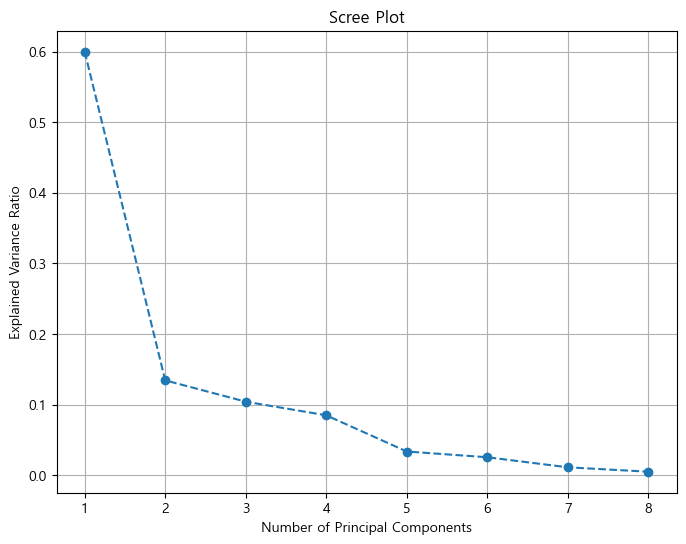

In [203]:
# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()
metrics_df['runtime'] = df['runtime'] #시즌
metrics_df['age_rating'] = df['age_rating'] #시즌
metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']
metrics_df['s1_retention_rate'] = df['s1_retention_rate'] #시즌
metrics_df['wins'] = df['wins']
metrics_df['nominations'] = df['nominations']

# 데이터 표준화
scaler = StandardScaler()
metrics_df_scaled = scaler.fit_transform(metrics_df)

# PCA 수행
pca = PCA()
pca.fit(metrics_df_scaled)

# Scree Plot 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [204]:
# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:")
for i, var_ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {var_ratio:.4f}")

Explained variance ratio for each principal component:
Principal Component 1: 0.5998
Principal Component 2: 0.1345
Principal Component 3: 0.1044
Principal Component 4: 0.0851
Principal Component 5: 0.0338
Principal Component 6: 0.0257
Principal Component 7: 0.0115
Principal Component 8: 0.0052


첫 번째 두 주성분 사용:

PC1과 PC2는 합쳐서 약 73.43%의 분산을 설명하므로, 데이터의 절반 이상을 설명할 수 있습니다.
데이터의 주요 패턴을 이해하기에 충분할 수 있습니다.

주성분 개수 결정:

설명된 분산 비율이 급격히 감소하는 지점까지의 주성분을 선택합니다.
이 경우, PC1부터 PC2까지의 주성분이 적절할 수 있습니다.

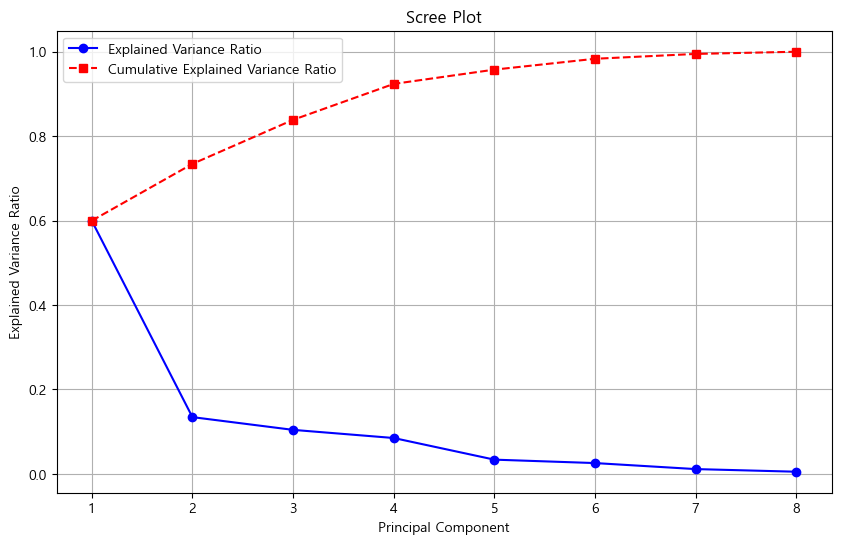

In [205]:
# 주성분 번호
components = range(1, len(explained_variance_ratio) + 1)

# 누적 설명된 분산 비율 계산
cumulative_variance_ratio = [sum(explained_variance_ratio[:i+1]) for i in range(len(explained_variance_ratio))]

# 팔꿈치 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(components, explained_variance_ratio, marker='o', linestyle='-', color='b', label='Explained Variance Ratio')
plt.plot(components, cumulative_variance_ratio, marker='s', linestyle='--', color='r', label='Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(components)
plt.legend()
plt.grid(True)
plt.show()


팔꿈치 그래프 (Scree Plot): 주성분 개수에 따른 설명된 분산의 그래프를 확인하여 '팔꿈치' 부분에서 설명된 분산의 증가가 완만해지는 지점을 찾습니다. 이 지점 이후의 주성분들은 데이터의 분산을 설명하는 데 큰 기여를 하지 않을 가능성이 높습니다.

In [206]:
# PCA 적용 (n_components=2)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(metrics_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_

# 각 주성분에 대한 가중치 딕셔너리
weights_pc1 = {metrics_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df.columns))}
weights_pc2 = {metrics_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df.columns))}

print("Weights for PC1:")
print(weights_pc1)

print("Weights for PC2:")
print(weights_pc2)

Weights for PC1:
{'watchlist': 0.6449078518319773, 'total_rate': 1.7904419538843959e-06, 'total_count': 0.7642556070787028, 'popularity': -0.0010399825706013536, 'user_review': 0.002469029671588874, 'critic_review': 0.0001688513502272924, 'wins': 5.3915201388402544e-05, 'nominations': 0.00014353441556802754}
Weights for PC2:
{'watchlist': -0.7642552443297077, 'total_rate': -3.7559807655945008e-06, 'total_count': 0.6449122279549447, 'popularity': 0.0010608819661127816, 'user_review': -0.0009864876102421596, 'critic_review': -0.00017856006130994155, 'wins': 4.8419357782084584e-05, 'nominations': -8.293455423550702e-05}


PC1: PC1은 주로 watchlist, total_count, user_review, critic_review, wins, nominations 변수들이 큰 양의 가중치를 가지고 있습니다. 이는 PC1이 이러한 변수들 사이의 양의 관계와 패턴을 설명한다는 것을 나타냅니다. 특히 critic_review, nominations, wins 등이 높은 가중치를 가지고 있어, 이들이 PC1을 구성하는 주요 요소라고 할 수 있습니다. 이 변수들은 주로 데이터를 설명하는 주요 변수들로 간주될 수 있습니다.

PC2: total_rate, popularity와 관련된 변수들이 큰 절대값의 가중치를 가지고 있으며 높은 기여를 함. 이들은 강한 음의 상관관계를 가지고 있습니다. 이 변수들은 데이터를 설명하는 또 다른 중요한 차원을 나타냅니다.

In [207]:
# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_

# 각 주성분에 대한 가중치 딕셔너리
weights_pc1 = {metrics_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df.columns))}
weights_pc2 = {metrics_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df.columns))}
print("Weights for PC1:", weights_pc1)
print("Weights for PC2:", weights_pc2)

Weights for PC1: {'watchlist': 0.6449078518319773, 'total_rate': 1.7904419538843959e-06, 'total_count': 0.7642556070787028, 'popularity': -0.0010399825706013536, 'user_review': 0.002469029671588874, 'critic_review': 0.0001688513502272924, 'wins': 5.3915201388402544e-05, 'nominations': 0.00014353441556802754}
Weights for PC2: {'watchlist': -0.7642552443297077, 'total_rate': -3.7559807655945008e-06, 'total_count': 0.6449122279549447, 'popularity': 0.0010608819661127816, 'user_review': -0.0009864876102421596, 'critic_review': -0.00017856006130994155, 'wins': 4.8419357782084584e-05, 'nominations': -8.293455423550702e-05}


In [209]:
# 각 주성분이 원래 변수들과 어떤 상관관계를 가지는지 확인
# (주성분의 계수 값으로 해석)
loadings = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=metrics_df_scaled.columns)
print('Loadings:\n', loadings)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
# 각 주성분의 가중치 설정 (설명된 분산 비율 사용)
weights = explained_variance_ratio[:2] / explained_variance_ratio[:2].sum()

# 각 주성분에 대한 가중치 출력
print(f"Weights for PC1, PC2: {weights}")

# 가중치 딕셔너리 설정
weights_pc1 = {metrics_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df.columns))}
weights_pc2 = {metrics_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df.columns))}

# 흥행지표 계산 함수 수정
def calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights):
    # 각 주성분의 흥행지표 계산
    metric_pc1 = sum(weights_pc1[col] * row[col] for col in metrics_df.columns)
    metric_pc2 = sum(weights_pc2[col] * row[col] for col in metrics_df.columns)
    
    # 종합 흥행지표 계산
    total_metric = weights[0] * metric_pc1 + weights[1] * metric_pc2
    return total_metric

# 종합 흥행지표 계산 및 결과 출력
df['success_metric'] = df.apply(lambda row: calculate_success_metric(row, weights_pc1, weights_pc2, weights), axis=1)

# 결과 출력
print(df[['korean_title', 'success_metric']])

Weights for PC1, PC2: [0.816767 0.183233]


TypeError: calculate_success_metric() missing 1 required positional argument: 'weights'

In [ ]:
# PCA 적용
pca = PCA()
pca.fit(metrics_df_scaled)

# 설명된 분산 비율 확인
explained_variance_ratio = pca.explained_variance_ratio_
print('Explained variance ratio:', explained_variance_ratio)
# 주성분 계수 확인
components = pca.components_
print('Principal components:\n', components)

# 각 주성분이 원래 변수들과 어떤 상관관계를 가지는지 확인
# (주성분의 계수 값으로 해석)
loadings = pd.DataFrame(components.T, columns=[f'PC{i+1}' for i in range(components.shape[0])], index=metrics_df_scaled.columns)
print('Loadings:\n', loadings)

# 최종 지표 생성 (예제 가중치 사용)
# 여기서는 첫 번째와 두 번째 주성분만 사용하고, 가중치를 0.7과 0.3으로 설정
weights = [0.7, 0.3]
final_metric = np.dot(pca.transform(metrics_df_scaled)[:, :2], weights)

# 결과 출력
print('Final metric:\n', final_metric)


Explained variance ratio: [0.48143092 0.13282807 0.10604367 0.09027866 0.07145566 0.05734387
 0.02701237 0.02024737 0.00917837 0.00418104]
Principal components:
 [[ 3.57737116e-02  5.48743874e-02  4.29419609e-01  1.79834613e-01
   4.25534305e-01 -4.87696074e-02  3.55260069e-01  4.04564761e-01
   3.86343400e-01  3.95431220e-01]
 [-6.80773334e-01 -7.00926720e-02  3.12570414e-02 -5.80819514e-01
   4.88669910e-02 -4.24178675e-01  2.99740613e-02  7.28358288e-02
   3.87042278e-02  5.73526273e-02]
 [ 1.35769460e-01 -8.41913681e-01 -3.21867030e-02  2.03749211e-01
  -1.29392324e-02 -3.61812391e-01 -1.80996850e-01 -1.27600836e-01
   1.78709103e-01  1.34699209e-01]
 [-3.96218315e-01 -3.80188127e-01 -2.82464364e-02 -6.27195023e-02
  -4.19340701e-03  8.13263782e-01 -2.65991015e-02  3.18368177e-02
   1.30826265e-01  1.16121776e-01]
 [-2.79081567e-01  3.65224105e-01 -1.15867623e-01  3.30401367e-01
  -1.02440335e-01 -7.16574035e-02 -5.67739086e-01 -1.89453428e-01
   3.90374636e-01  3.74022766e-01]
 [ 

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-5:
Traceback (most recent call last):
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\subprocess.py", line 1386, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 24: invalid start byte
c:\Users\rbfl7\miniconda3\envs\

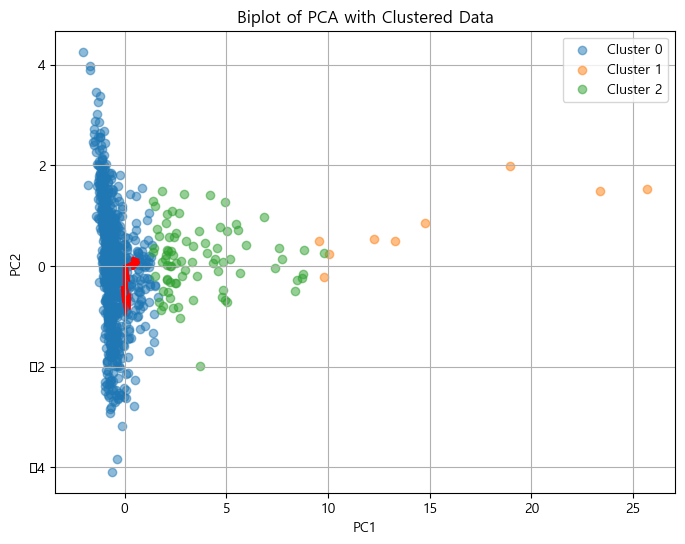

In [ ]:
from sklearn.cluster import KMeans

# PCA 결과를 데이터프레임에 추가
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# 데이터 군집화 (예시로 K-means 사용)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(metrics_df_scaled)

# Biplot 그리기
plt.figure(figsize=(8, 6))

# 각 군집 별로 Biplot을 그립니다.
for cluster_num in range(3):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.5)

    # 변수들을 화살표로 그리기
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):

        plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.7, head_width=0.2) 



plt.title('Biplot of PCA with Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()


c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


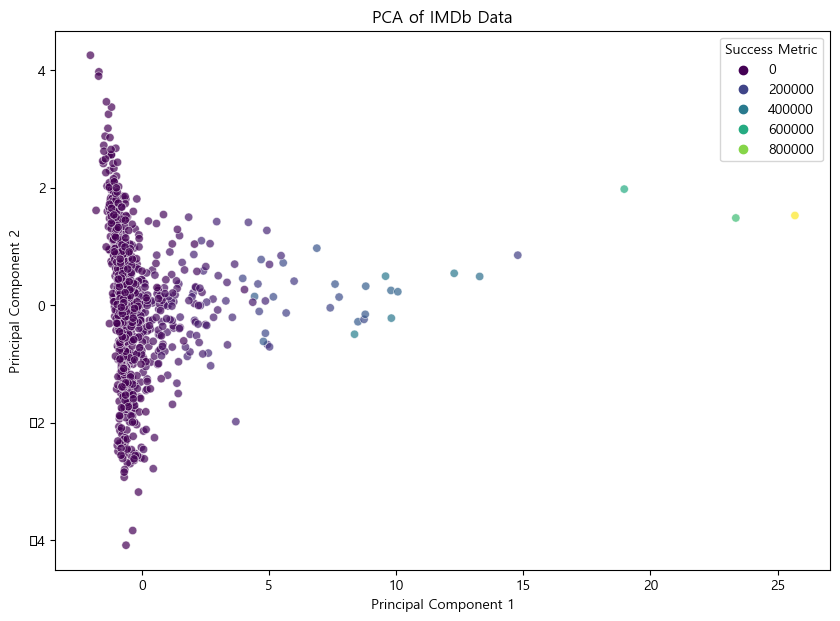

In [ ]:
# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='success_metric', palette='viridis', alpha=0.7)
plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()

In [ ]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio for PC1 to PC3: {explained_variance_ratio[:3]}")

Explained variance ratio for PC1 to PC3: [0.48143092 0.13282807 0.10604367]


             korean_title  success_metric
Unnamed: 0                               
17                브레이킹 배드   978992.668004
24                기묘한 이야기   672385.891383
7                   워킹 데드   603693.147267
27               피키 블라인더스   419393.408056
19                   바이킹스   390390.777538
54                    덱스터   390162.805920
46                  블랙 미러   386775.436430
42                베터 콜 사울   352731.927114
31                     위쳐   312619.048872
59              하우스 오브 카드   311196.219927
12                     슈츠   290780.936001
51                  종이의 집   286688.362485
84                   나르코스   276239.623685
13                     다크   275826.730752
43                  퀸스 갬빗   267813.629445
28                    하우스   260973.422310
9                     플래시   257660.975492
0                  오징어 게임   232639.121396
50                    루시퍼   228736.262758
26              뱀파이어 다이어리   226672.691091
33                    오자크   217749.584533
20                  마인드헌터   214546

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


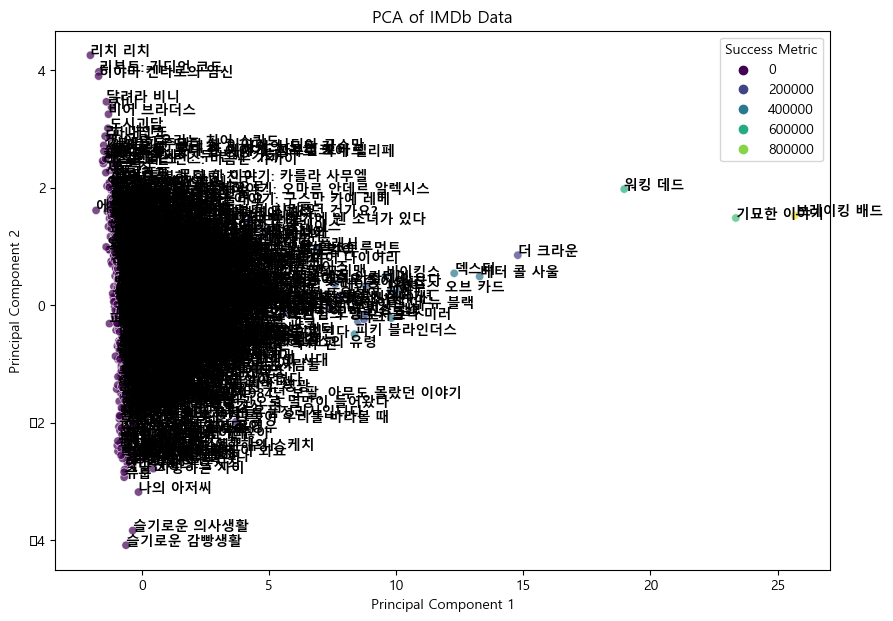

In [ ]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력 (korean_title 사용)
top_30 = sorted_df[['korean_title', 'success_metric']].head(30)

# 결과 출력
print(top_30)

# 시각화
plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(data=df, x='PC1', y='PC2', hue='success_metric', palette='viridis', alpha=0.7)

# 각 점에 korean_title 표시
for line in range(0, df.shape[0]):
    scatterplot.text(df.PC1[line], df.PC2[line], df.korean_title[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()

---

In [ ]:
# 가중치와 각 지표를 곱하여 흥행지표 계산
# metrics_df['success_metric'] = np.dot(metrics_df, pca_weights)


# 상관계수를 이용한 가중치는 어떻게 넣어야 되지?

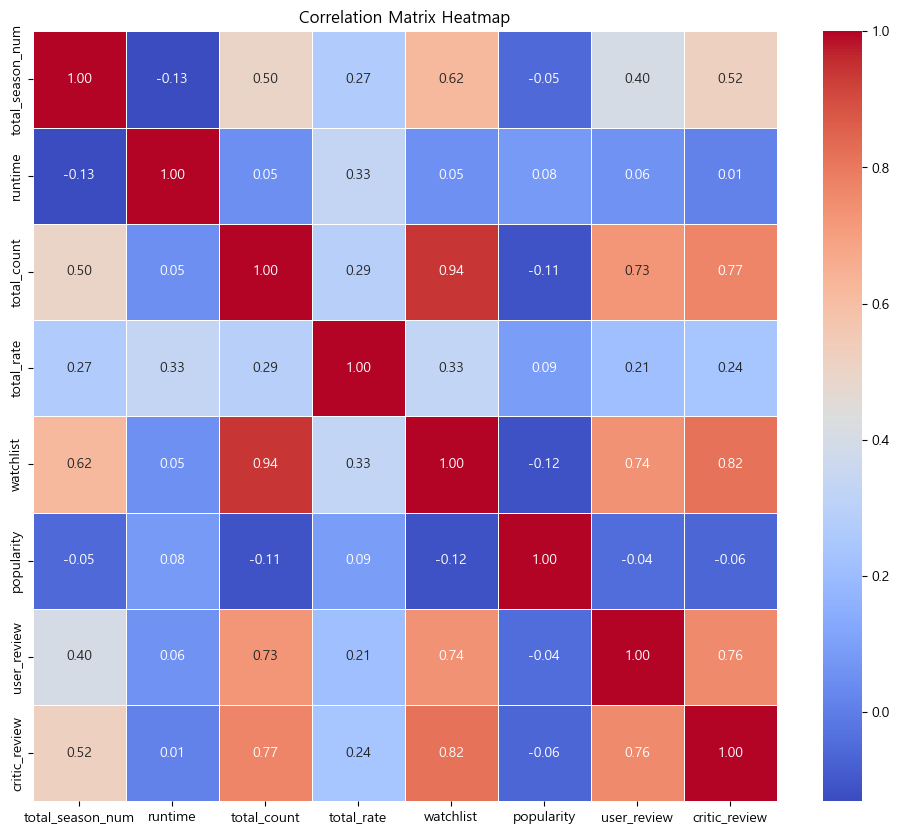

In [ ]:
numeric_columns = ['total_season_num', 'runtime', 'total_count', 'total_rate', 
                   'watchlist', 'popularity', 'user_review', 'critic_review']
numeric_df = df[numeric_columns]

# 상관 행렬 계산
correlation_matrix = numeric_df.corr()

# Heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

---

# 시즌1만 있는 드라마

In [ ]:
df_1 = df[df['total_season_num']==1]
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 904
Data columns (total 44 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   korean_title        639 non-null    object 
 1   english_title       639 non-null    object 
 2   year                639 non-null    int64  
 3   total_season_num    639 non-null    int64  
 4   runtime             639 non-null    int64  
 5   genre               639 non-null    object 
 6   age_rating          639 non-null    int32  
 7   production_country  639 non-null    object 
 8   total_count         639 non-null    int64  
 9   total_rate          639 non-null    float64
 10  watchlist           639 non-null    int64  
 11  popularity          639 non-null    int64  
 12  user_review         639 non-null    int64  
 13  critic_review       639 non-null    int64  
 14  production          563 non-null    object 
 15  distributor         633 non-null    object 
 16  season_1     

In [ ]:
# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()
metrics_df['runtime'] = df_1['runtime']
metrics_df['age_rating'] = df_1['age_rating']
metrics_df['watchlist'] = df_1['watchlist']
metrics_df['total_rate'] = df_1['total_rate']
metrics_df['total_count'] = df_1['total_count']
metrics_df['popularity'] = df_1['popularity']
metrics_df['user_review'] = df_1['user_review']
metrics_df['critic_review'] = df_1['critic_review']
metrics_df['s1_retention_rate'] = df_1['s1_retention_rate']
metrics_df['wins'] = df_1['wins']
metrics_df['nominations'] = df_1['nominations']

# 데이터 표준화
scaler = StandardScaler()
metrics_df_scaled = scaler.fit_transform(metrics_df)

# PCA 수행
pca = PCA()
pca.fit(metrics_df_scaled)

# Scree Plot 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

KeyError: 's1_retention_rate'

In [ ]:
# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:")
for i, var_ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {var_ratio:.4f}")

Explained variance ratio for each principal component:
Principal Component 1: 0.4089
Principal Component 2: 0.1367
Principal Component 3: 0.1051
Principal Component 4: 0.0895
Principal Component 5: 0.0787
Principal Component 6: 0.0690
Principal Component 7: 0.0474
Principal Component 8: 0.0238
Principal Component 9: 0.0174
Principal Component 10: 0.0172
Principal Component 11: 0.0062


In [ ]:
# PCA 적용 (n_components=3)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(metrics_df_scaled)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_

# 각 주성분에 대한 가중치 딕셔너리
weights_pc1 = {metrics_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df.columns))}
weights_pc2 = {metrics_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df.columns))}
weights_pc3 = {metrics_df.columns[i]: pca_weights[2, i] for i in range(len(metrics_df.columns))}

print("Weights for PC1:")
print(weights_pc1)

print("Weights for PC2:")
print(weights_pc2)

print("Weights for PC3:")
print(weights_pc3)

Weights for PC1:
{'runtime': 0.08026122154552694, 'age_rating': 0.09379016264367988, 'watchlist': 0.4418828012724459, 'total_rate': 0.13726472255322983, 'total_count': 0.4370220906712077, 'popularity': 0.049319597520951844, 'user_review': 0.38769105990548186, 'critic_review': 0.3922189171371438, 's1_retention_rate': 0.14845750909824007, 'wins': 0.3198502862207051, 'nominations': 0.3856875972351721}
Weights for PC2:
{'runtime': 0.5859489869542005, 'age_rating': -0.2172787451698747, 'watchlist': -0.057546093772120714, 'total_rate': 0.6369261430441402, 'total_count': -0.08273790158766914, 'popularity': 0.2918656289305487, 'user_review': -0.1575280607603858, 'critic_review': -0.23057182704681745, 's1_retention_rate': 0.01667392544819627, 'wins': 0.1488846954841767, 'nominations': 0.08951553819967295}
Weights for PC3:
{'runtime': -0.1789164555184018, 'age_rating': -0.5783114480572732, 'watchlist': -0.0178121537424599, 'total_rate': 0.015224361793838277, 'total_count': 0.0814359692784275, 'p

In [ ]:
# 각 주성분의 가중치 설정 (설명된 분산 비율 사용)
weights = explained_variance_ratio[:3] / explained_variance_ratio[:3].sum()

# 각 주성분에 대한 가중치 출력
print(f"Weights for PC1, PC2, PC3: {weights}")

# 가중치 딕셔너리 설정
weights_pc1 = {metrics_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df.columns))}
weights_pc2 = {metrics_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df.columns))}
weights_pc3 = {metrics_df.columns[i]: pca_weights[2, i] for i in range(len(metrics_df.columns))}

# 흥행지표 계산 함수 수정
def calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights):
    # 각 주성분의 흥행지표 계산
    metric_pc1 = sum(weights_pc1[col] * row[col] for col in metrics_df.columns)
    metric_pc2 = sum(weights_pc2[col] * row[col] for col in metrics_df.columns)
    metric_pc3 = sum(weights_pc3[col] * row[col] for col in metrics_df.columns)
    
    # 종합 흥행지표 계산
    total_metric = weights[0] * metric_pc1 + weights[1] * metric_pc2 + weights[2] * metric_pc3
    return total_metric

# 종합 흥행지표 계산 및 결과 출력
df_1['success_metric'] = df_1.apply(lambda row: calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights), axis=1)

# 결과 출력
print(df_1[['korean_title', 'success_metric']])

Weights for PC1, PC2, PC3: [0.62836375 0.21012641 0.16150984]
                       korean_title  success_metric
Unnamed: 0                                         
0                            오징어 게임   214670.876605
1                          12인의 심판자     4367.364811
2                            희생자 게임     1088.858423
5                               외교관    41816.426187
10                        슬기로운 감빵생활     3586.768845
...                             ...             ...
900                             레일라     3262.443845
901                     100만 엔의 여인들     1051.271037
902                         킬러 코미디언      805.463451
903                              달러      193.073768
904         엘리트들, 못다 한 이야기: 나디아 구스만      945.635505

[639 rows x 2 columns]


C:\Users\rbfl7\AppData\Local\Temp\ipykernel_29632\1668109933.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['success_metric'] = df_1.apply(lambda row: calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights), axis=1)


C:\Users\rbfl7\AppData\Local\Temp\ipykernel_29632\194130992.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['PC1'] = principal_components[:, 0]
C:\Users\rbfl7\AppData\Local\Temp\ipykernel_29632\194130992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['PC2'] = principal_components[:, 1]
c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explic

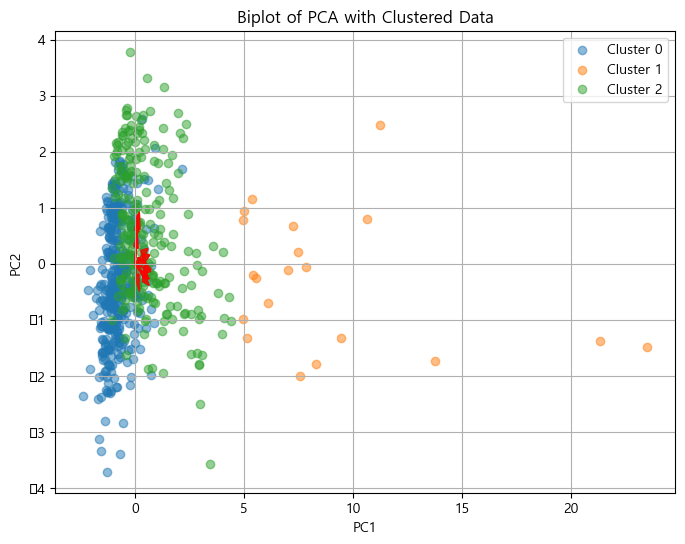

In [ ]:
from sklearn.cluster import KMeans

# PCA 결과를 데이터프레임에 추가
df_1['PC1'] = principal_components[:, 0]
df_1['PC2'] = principal_components[:, 1]

# 데이터 군집화 (예시로 K-means 사용)
kmeans = KMeans(n_clusters=3, random_state=42)
df_1['cluster'] = kmeans.fit_predict(metrics_df_scaled)

# Biplot 그리기
plt.figure(figsize=(8, 6))

# 각 군집 별로 Biplot을 그립니다.
for cluster_num in range(3):
    cluster_data = df_1[df_1['cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.5)

    # 변수들을 화살표로 그리기
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):

        plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.7, head_width=0.2) 



plt.title('Biplot of PCA with Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


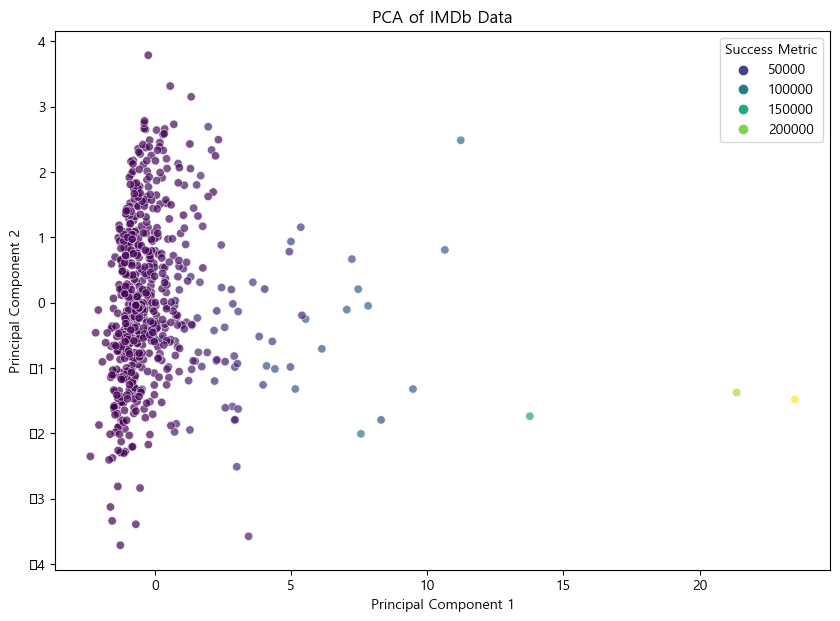

In [ ]:
# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_1, x='PC1', y='PC2', hue='success_metric', palette='viridis', alpha=0.7)
plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()

                korean_title  success_metric
Unnamed: 0                                  
43                     퀸스 갬빗   246813.644510
0                     오징어 게임   214670.876605
66                 힐 하우스의 유령   144869.566556
64                       샌드맨    99892.821189
107            그들이 우리를 바라볼 때    85063.632384
69                      보디가드    79877.619311
156                       다머    77045.966607
63                       원피스    75731.085273
45                    성난 사람들    74240.171966
75                  어둠 속의 미사    74046.489286
85               믿을 수 없는 이야기    72323.611598
157                     1899    71686.463183
57                   어셔가의 몰락    67206.148766
48                  나이트 에이전트    64302.516233
299               블라이 저택의 유령    61602.289368
138                      매니악    57838.630981
87                    조용한 희망    56679.679924
76               그 땅에는 신이 없다    50377.049745
233                그리고 베를린에서    48097.467269
282                      래치드    45635.494032
41        

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


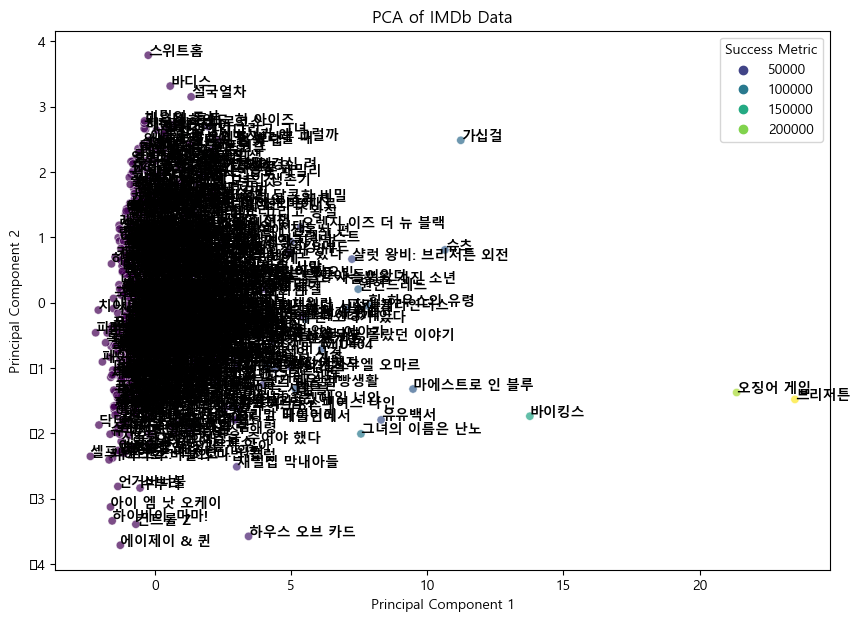

In [ ]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df_1.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력 (korean_title 사용)
top_30 = sorted_df[['korean_title', 'success_metric']].head(30)

# 결과 출력
print(top_30)

# 시각화
plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(data=df_1, x='PC1', y='PC2', hue='success_metric', palette='viridis', alpha=0.7)

# 각 점에 korean_title 표시
for i in range(df_1.shape[0]):
    scatterplot.text(df_1['PC1'].iloc[i], df_1['PC2'].iloc[i], df['korean_title'].iloc[i], horizontalalignment='left', size='medium', color='black', weight='semibold')


plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()

---

# 시즌2

In [ ]:
df = df[df['total_season_num'] >= 2]

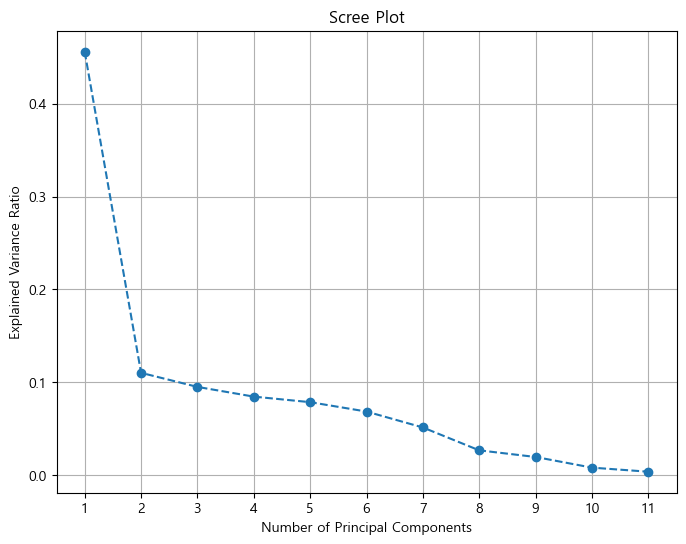

In [ ]:
# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()
metrics_df['runtime'] = df['runtime']
metrics_df['age_rating'] = df['age_rating']
metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']
metrics_df['s1_retention_rate'] = df['s1_retention_rate']
metrics_df['wins'] = df['wins']
metrics_df['nominations'] = df['nominations']

# 데이터 표준화
scaler = StandardScaler()
metrics_df_scaled = scaler.fit_transform(metrics_df)

# PCA 수행
pca = PCA()
pca.fit(metrics_df_scaled)

# Scree Plot 그리기
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid(True)
plt.show()

In [ ]:
# 설명된 분산 비율 출력
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio for each principal component:")
for i, var_ratio in enumerate(explained_variance_ratio, start=1):
    print(f"Principal Component {i}: {var_ratio:.4f}")

Explained variance ratio for each principal component:
Principal Component 1: 0.4560
Principal Component 2: 0.1100
Principal Component 3: 0.0948
Principal Component 4: 0.0844
Principal Component 5: 0.0784
Principal Component 6: 0.0683
Principal Component 7: 0.0511
Principal Component 8: 0.0265
Principal Component 9: 0.0193
Principal Component 10: 0.0078
Principal Component 11: 0.0034


In [ ]:
# PCA 적용 (n_components=3)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(metrics_df_scaled)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_

# 각 주성분에 대한 가중치 딕셔너리
weights_pc1 = {metrics_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df.columns))}
weights_pc2 = {metrics_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df.columns))}
weights_pc3 = {metrics_df.columns[i]: pca_weights[2, i] for i in range(len(metrics_df.columns))}

print("Weights for PC1:")
print(weights_pc1)

print("Weights for PC2:")
print(weights_pc2)

print("Weights for PC3:")
print(weights_pc3)

Weights for PC1:
{'runtime': 0.12340158991437919, 'age_rating': 0.05111047856681284, 'watchlist': 0.41762020888660767, 'total_rate': 0.24336162425333005, 'total_count': 0.41292163044809743, 'popularity': -0.1648463557385643, 'user_review': 0.33453730999206066, 'critic_review': 0.39121071232373045, 's1_retention_rate': 0.044899975744749084, 'wins': 0.3756035211948001, 'nominations': 0.37788173744702963}
Weights for PC2:
{'runtime': -0.6267185493687075, 'age_rating': -0.5850286979758756, 'watchlist': 0.006083853044418054, 'total_rate': -0.37677556059427264, 'total_count': 0.05395212033889827, 'popularity': -0.03675551125532879, 'user_review': -0.028357645711914188, 'critic_review': 0.06654279095280104, 's1_retention_rate': -0.15714638930194874, 'wins': 0.2200631817347033, 'nominations': 0.20087746631264455}
Weights for PC3:
{'runtime': 0.21279671125757277, 'age_rating': -0.4448010834366779, 'watchlist': -0.0596696096721785, 'total_rate': 0.04363574697958906, 'total_count': -0.08255124214

In [ ]:
# 각 주성분의 가중치 설정 (설명된 분산 비율 사용)
weights = explained_variance_ratio[:3] / explained_variance_ratio[:3].sum()

# 각 주성분에 대한 가중치 출력
print(f"Weights for PC1, PC2, PC3: {weights}")

# 가중치 딕셔너리 설정
weights_pc1 = {metrics_df.columns[i]: pca_weights[0, i] for i in range(len(metrics_df.columns))}
weights_pc2 = {metrics_df.columns[i]: pca_weights[1, i] for i in range(len(metrics_df.columns))}
weights_pc3 = {metrics_df.columns[i]: pca_weights[2, i] for i in range(len(metrics_df.columns))}

# 흥행지표 계산 함수 수정
def calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights):
    # 각 주성분의 흥행지표 계산
    metric_pc1 = sum(weights_pc1[col] * row[col] for col in metrics_df.columns)
    metric_pc2 = sum(weights_pc2[col] * row[col] for col in metrics_df.columns)
    metric_pc3 = sum(weights_pc3[col] * row[col] for col in metrics_df.columns)
    
    # 종합 흥행지표 계산
    total_metric = weights[0] * metric_pc1 + weights[1] * metric_pc2 + weights[2] * metric_pc3
    return total_metric

# 종합 흥행지표 계산 및 결과 출력
df['success_metric'] = df.apply(lambda row: calculate_success_metric(row, weights_pc1, weights_pc2, weights_pc3, weights), axis=1)

# 결과 출력
print(df[['korean_title', 'success_metric']])

Weights for PC1, PC2, PC3: [0.6900581  0.16644473 0.14349717]
                  korean_title  success_metric
Unnamed: 0                                    
3           스위트 투스: 사슴뿔을 가진 소년    46607.503616
4                         스위트홈    21334.440387
6                         굿 닥터    91853.603132
7                        워킹 데드   586050.781444
8             비르기트: 왕국, 권력, 영광    23405.073487
...                        ...             ...
868                      꽃들의 집     4706.348084
869                 우리가 몰랐던 그녀     3153.127118
881                 악플러는 꺼져주세요     3784.463410
882                   거짓말의 거짓말      941.213108
884                      헨테파이드     2166.741829

[266 rows x 2 columns]


c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


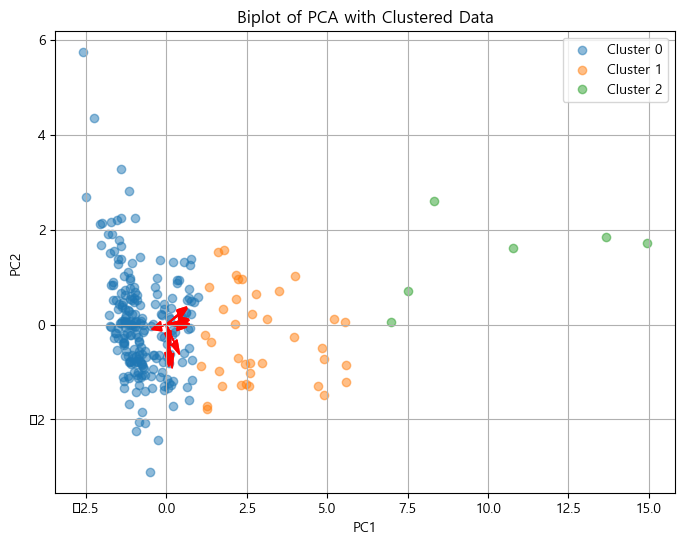

In [ ]:
from sklearn.cluster import KMeans

# PCA 결과를 데이터프레임에 추가
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# 데이터 군집화 (예시로 K-means 사용)
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(metrics_df_scaled)

# Biplot 그리기
plt.figure(figsize=(8, 6))

# 각 군집 별로 Biplot을 그립니다.
for cluster_num in range(3):
    cluster_data = df[df['cluster'] == cluster_num]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster_num}', alpha=0.5)

    # 변수들을 화살표로 그리기
    for i, (pc1, pc2) in enumerate(zip(pca.components_[0, :], pca.components_[1, :])):

        plt.arrow(0, 0, pc1, pc2, color='r', alpha=0.7, head_width=0.2) 



plt.title('Biplot of PCA with Clustered Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


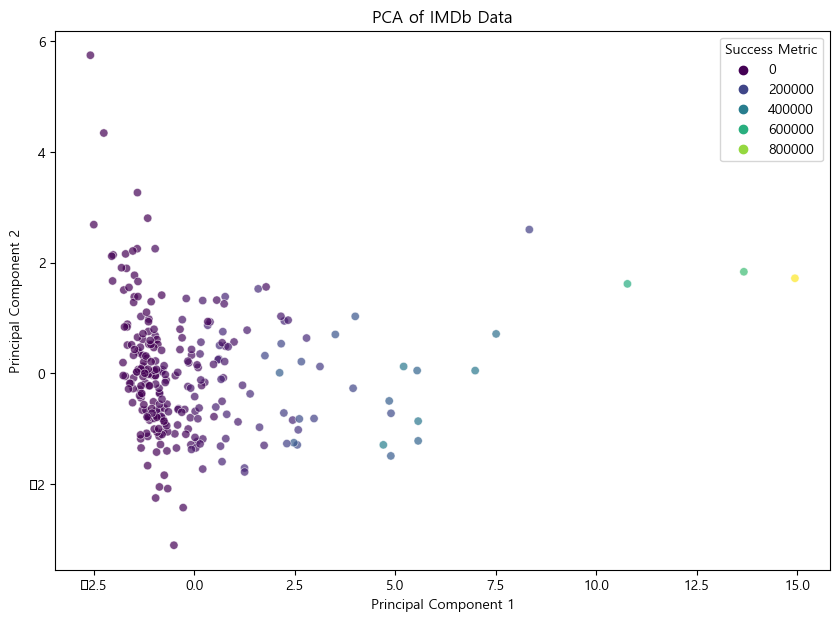

In [ ]:
# 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='success_metric', palette='viridis', alpha=0.7)
plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()

             korean_title  success_metric
Unnamed: 0                               
17                브레이킹 배드   949561.115612
24                기묘한 이야기   652598.951316
7                   워킹 데드   586050.781444
27               피키 블라인더스   407347.921143
19                   바이킹스   379225.210297
54                    덱스터   378646.184152
46                  블랙 미러   375596.294055
42                베터 콜 사울   342406.310280
31                     위쳐   303496.221236
59              하우스 오브 카드   302167.658885
12                     슈츠   282375.296895
51                  종이의 집   278294.601713
84                   나르코스   268223.202947
13                     다크   267887.567848
28                    하우스   253264.974341
9                     플래시   250337.907862
50                    루시퍼   222174.231025
26              뱀파이어 다이어리   220171.307256
33                    오자크   211490.147155
20                  마인드헌터   208381.620137
23                  블랙리스트   197436.207100
109         오렌지 이즈 더 뉴 블랙   197367

c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


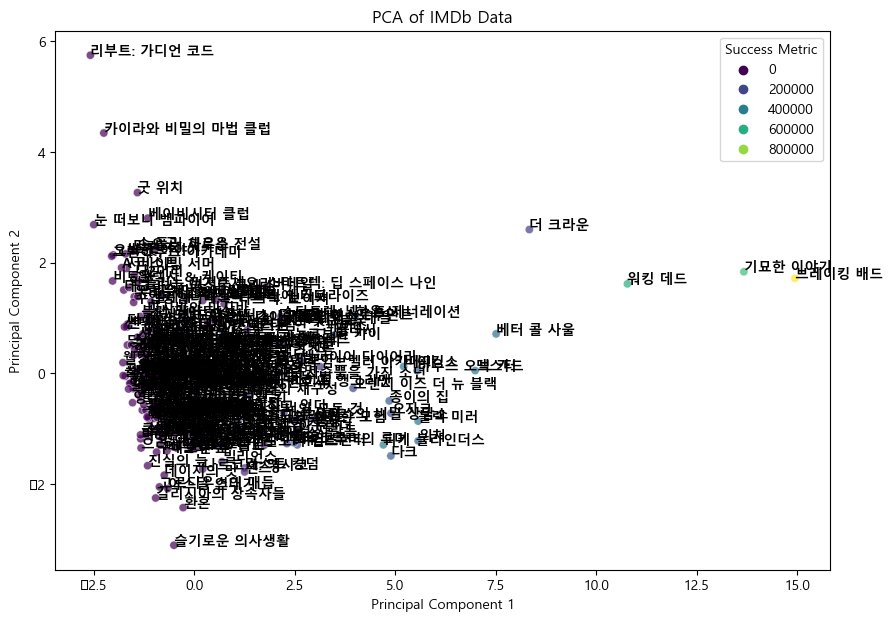

In [ ]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력 (korean_title 사용)
top_30 = sorted_df[['korean_title', 'success_metric']].head(30)

# 결과 출력
print(top_30)

# 시각화
plt.figure(figsize=(10, 7))
scatterplot = sns.scatterplot(data=df, x='PC1', y='PC2', hue='success_metric', palette='viridis', alpha=0.7)

# 각 점에 korean_title 표시
for i in range(df.shape[0]):
    scatterplot.text(df['PC1'].iloc[i], df['PC2'].iloc[i], df['korean_title'].iloc[i], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('PCA of IMDb Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Success Metric')
plt.show()